## Plan

Plan:

1. Linear Regression with exact solution
2. Linear Regression with L2 regularization and exact solution
3. LR + Gradient descent solution
4. L1 and L2 regularization + Gradient descent
5. Batch Gradient descent

### Problem

Problem: use linear combinations of X to predict y. The idea that linear combination of X is a good way to describe y is our first assumption. Mathematically it can be represented as the Hypothesys Function: 

$$
\text{Iterative form}\\
y^{(i)} \approx h(\theta) = \sum_{j=0}^{d} (\theta_jx_j^{(i)})
$$


$$
\text{Vector form}\\
\vec{y} \approx h(\theta) = X*\theta
$$

where $X$ - a matrix $n*d$ with  
$i \in \{1 ... n\}$ - number of examples (rows)  
$j \in \{1 ... d\}$ - number of features (columns)

### Loss function

The second step - is to find **the best $\theta$**. There are many ways to describe what 'the best' means. Here are some of them:
1. Probabilistic approach / Maximum Likelihood.

Assumptions:
* Assumes that the errors follow a normal distribution.
* Assumes that the errors are independent and identically distributed (i.i.d.).
* Then we need to choose **the most likely** $\theta$ using Maximum Likelihood approach

Solution:
Minimization of Squared Error

2. Linear algebra approach

Assumptions:
* If $y$ is approximately is a linear combination of $X$, then $\theta$ should be the closest vector to vector $y$ in column space $X$

Solution:
Minimization of Squared Error

3. Gauss-Markov theorem

Assumption (basically, similar to probabilistic approach):
* Assumes that the errors have zero mean.
* Assumes that the errors have constant variance (homoscedasticity).
* Assumes that the errors are uncorrelated.
* Assumes that the errors are normally distributed.

Then what whould be the BLUE (Best Linear Unbiased Estimators) $\theta$ - meaning the $\theta$ with smallest variance?

Solution:
Minimization of Squared Error

Even though minimization of MSE is far from solving the exact buiseness problems, often it works.

$$
\text{Iterative form}\\
J(\theta) = \frac{1}{n} * \sum_{i=1}^{n} (h^{(i)}(\theta) - y^{(i)})^2\\
J(\theta) = \frac{1}{n} * \sum_{i=1}^{n} (\sum_{j=0}^{d} (\theta_{j}x_{j}^{(i)}) - y^{(i)})^2 \\
\text{Vector form:} \\
J(\theta) = \frac{1}{n} * (X*\theta - y)^T*(X*\theta - y)
$$

### Find the minimum

To find the minimum of J there are two ways:
* Find the derivative of J with respect to Theta, set it equal to zero and solve the equation for Theta. That's possible for linear regression and the solution is:
$$
\text{Iterative form}\\
\frac{\partial}{\partial{\theta_j}} J(\theta) = \frac{1}{n} * \sum_{i=1}^{n} \left(\sum_{j=0}^{d} \left(\theta_{j}x_{j}^{(i)} \right) - y^{(i)} \right) * x_{j}^{(i)} \\
\text{Vector form:} \\
\nabla J(\theta) = \frac{1}{n} * (X \theta - y) * X \\
\nabla J(\theta) = 0 \\
\frac{1}{n} * \left(X \theta - y \right) * X = 0\\
\frac{1}{n} * X^TX\theta - \frac{1}{n} * X^Ty = 0 \\
\text{Finally:} \\
\theta = \left(\frac{1}{n} * X^T X \right)^{-1}*\frac{1}{n} * X^T y
$$
* Second way - find the derivative of J with respect to Theta and use gradient descent to find (almost) the minimum.

### Gradient Descent.

Update rule for Theta will be:

$$
\text{Iterative form}\\
\theta_j := \theta_j - \alpha * \frac{\partial}{\partial{\theta_j}} J(\theta) \\
\theta_j := \theta_j - \alpha * \frac{1}{n} * \sum_{i=1}^{n} \left(\sum_{j=0}^{d} \left(\theta_{j}x_{j}^{(i)} \right) - y^{(i)} \right) * x_{j}^{(i)} \\
\text{Vector form:} \\
\theta := \theta - \alpha * \nabla J(\theta) \\
\theta := \theta - \alpha * \frac{1}{n} * \left(X * \theta - y \right) * X
$$

### Regularization

**Important note: $\theta_0 \text{ / Intercept}$ should not be regularized!**

$$
\text{Iterative form}\\
J(\theta) = \frac{1}{n} * \sum_{i=1}^{n} (h^{(i)}(\theta) - y^{(i)})^2 + \lambda * ||\theta||_k^k\\
J(\theta) = \frac{1}{n} * \sum_{i=1}^{n} (\sum_{j=0}^{d} (\theta_{j}x_{j}^{(i)}) - y^{(i)})^2  + \lambda * ||\theta||_k^k\\
\text{Vector form:} \\
J(\theta) = \frac{1}{n} * (X*\theta - y)^T*(X*\theta - y) + \lambda * ||\theta||_k^k\\
$$

We just limit the absolute value of $\theta$ using its k-norm. Then for $k = 2$:

$$
\text{Iterative form}\\
\frac{\partial}{\partial{\theta_j}} J(\theta) = \frac{2}{n} * \sum_{i=1}^{n} (\sum_{j=0}^{d} (\theta_{j}x_{j}^{(i)}) - y^{(i)}) * x_{j}^{(i)}) + 2 * \lambda * \theta_j\\
\text{Vector form:} \\
\nabla J(\theta) = \frac{2}{n} * \left(X \theta - y \right) * X  + 2 * \lambda * \theta\\
$$

Exact solution for $k = 2$:

$$
\theta = \left(\frac{1}{n} * X^T X + \lambda * I \right)^{-1}*\frac{1}{n} * X^T y
$$

Gradient solution:

$$
\theta := \theta - \alpha * \nabla J(\theta) \\
\theta := \theta - \alpha * \left( \frac{2}{n} * \left(X \theta - y \right) * X  + 2 * \lambda * \theta \right)
$$

## Data Info

In [8]:
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

RANDOM_STATE = 42

In [9]:
base = 'C:/Users/anton/OneDrive/data_science/yandex_practicum/datasets/'
data = pd.read_csv(base + 'real_estate_data.csv', sep='\t')

# Quick data preprocess as I have already studied this dataset
data = shuffle(data)
data['last_price'] = data['last_price'] / 10**6
data = data[data['last_price'] < 15]

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

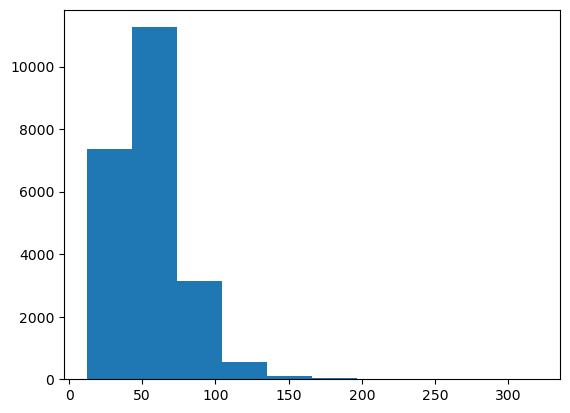

rooms
1    8025
2    7764
3    5352
4     890
0     195
5     184
6      37
7       7
Name: count, dtype: int64


In [10]:
features = data[['total_area', 'rooms']]
target = data['last_price']

features = features.dropna()

plt.hist(features['total_area'])
plt.show()

print(features['rooms'].value_counts())

In [11]:
features_train, features_test, target_train, target_test =\
    train_test_split(features, target, shuffle=True)
    
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

X = np.concatenate((features_train, np.ones((len(features_train),1))), axis=1)
y = target_train.values

X_test = np.concatenate((features_test, np.ones((len(features_test),1))), axis=1)
y_test = target_test.values

print('X:', X.shape, 'y:', y.shape, 'X_test:', X_test.shape, 'y_test:', y_test.shape)

X: (16840, 3) y: (16840,) X_test: (5614, 3) y_test: (5614,)


## Exact solution

In [13]:
# closed-form solution using normal equation
theta = np.linalg.inv(X.T@X)@X.T@y
predict_train = X@theta
predict_test = X_test@theta

print('RMSE train:', MSE(y, predict_train, squared=False))
print('RMSE test:', MSE(y_test, predict_test, squared=False))

RMSE train: 1.7549828983590983
RMSE test: 1.6893287756943245


In [14]:
# Compare with SciKit Learn
model = LinearRegression()
model.fit(X, y)
predict_train = model.predict(X)
predict_test = model.predict(X_test)

print('RMSE train:', MSE(y, predict_train, squared=False))
print('RMSE test:', MSE(y_test, predict_test, squared=False))

RMSE train: 1.7549828983590983
RMSE test: 1.6893287756943232


## Gradient descent implementation

Initial thetas: [0. 0. 0.]
Final RMSE train: 1.760246127785884
RMSE test: 1.6985323737893687


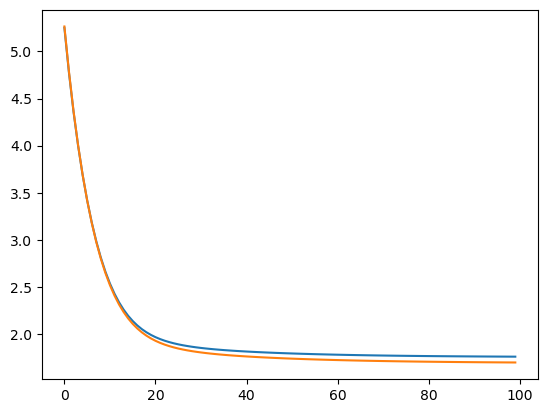

In [16]:
theta = np.zeros(X.shape[1])
thetas = []
thetas.append(theta)
print('Initial thetas:', thetas[0])

rmses = []
rmses_test = []

num_features = X.shape[0]
alpha = 0.1
n_steps = 100

for _ in range(n_steps):
    theta -= alpha * (X@theta - y) @ X / num_features
    rmse = MSE(X@theta, y, squared=False)
    rmse_test = MSE(X_test@theta, y_test, squared=False)
    thetas.append(theta)
    rmses.append(rmse)
    rmses_test.append(rmse_test)

plt.plot(rmses)
plt.plot(rmses_test)
print('Final RMSE train:', rmses[-1])
print('RMSE test:', rmses_test[-1])

### Stochastic Gradient descent

Best score train: 1.7710405750918632


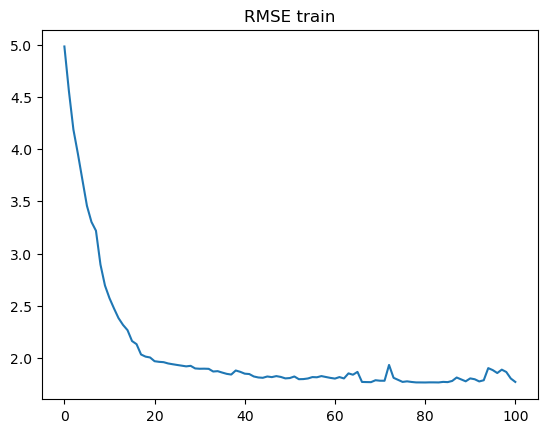

In [18]:
# stochastic gradiend descent
index = 0
B = 10 # batch size

alpha = 0.1
theta = np.zeros(X.shape[1])
rmses = []
total_steps = 100
step = 0
while step <= total_steps:
    step += 1
    X_batch = X[index:index+B]
    y_batch = y[index:index+B]
    theta -= alpha * (X_batch@theta - y_batch) @ X_batch / B
    
    rmse = MSE(X@theta, y, squared=False)
    rmses.append(rmse)
    index += B
pd.Series(rmses).plot(title='RMSE train')
print('Best score train:', rmses[-1])

## Regularization

### L2 regularization

In [21]:
# closed-form solution using normal equation
lmbd = 2
num_features = X.shape[0] # compensation for X size
identity = np.identity(X.shape[1])
# important step:
identity[-1] = 0

theta = np.linalg.inv(X.T@X / num_features + lmbd * identity)@X.T@y / num_features
predict_train = X@theta
predict_test = X_test@theta

print('RMSE train:', MSE(y, predict_train, squared=False))
print('RMSE test:', MSE(y_test, predict_test, squared=False))
print('Final thetas:', theta)

RMSE train: 2.2002146949850574
RMSE test: 2.178571931616322
Final thetas: [0.58659555 0.28005631 5.13853629]


Initial thetas: [0. 0. 0.]
Final RMSE train: 2.2002146992190865
RMSE test: 2.1785732441994177
Final thetas: [0.58659555 0.28005631 5.13839981]


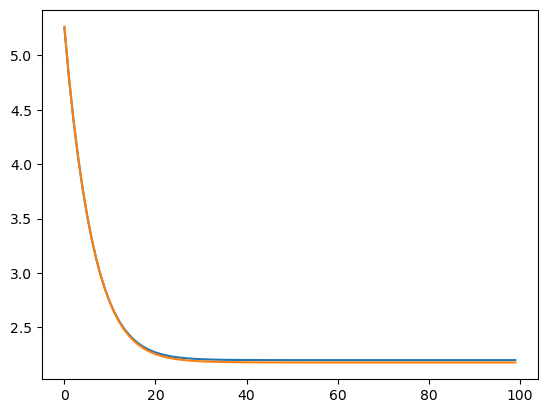

In [22]:
theta = np.zeros(X.shape[1])
thetas = []
thetas.append(theta)
print('Initial thetas:', thetas[0])

rmses = []
rmses_test = []

alpha = 0.1
lmbd = 2
num_features = X.shape[0] # compensation for X size
n_steps = 100

for _ in range(n_steps):
    dummy_theta = theta.copy()
    dummy_theta[2] = 0
    theta -= alpha * ((X@theta - y) @ X / num_features + lmbd * dummy_theta)
    rmse = MSE(y, X@theta, squared=False)
    rmse_test = MSE(y_test, X_test@theta, squared=False)
    
    thetas.append(theta)
    rmses.append(rmse)
    rmses_test.append(rmse_test)

plt.plot(rmses)
plt.plot(rmses_test)
print('Final RMSE train:', rmses[-1])
print('RMSE test:', rmses_test[-1])
print('Final thetas:', thetas[-1])

### L1 regularization

Initial thetas: [0. 0. 0.]
Final RMSE train: 2.645746854106436
RMSE test: 2.6416487869539256
Final thetas: [0.0187636  0.05625311 5.10811344]


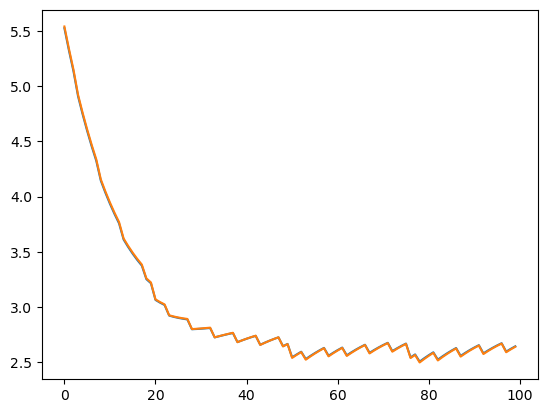

In [24]:
theta = np.zeros(X.shape[1])
thetas = []
thetas.append(theta)
print('Initial thetas:', thetas[0])

rmses = []
rmses_test = []

alpha = 0.05
lmbd = 2
num_features = X.shape[0] # compensation for X size
n_steps = 100

for _ in range(n_steps):
    dummy_theta = theta.copy()
    dummy_theta[2] = 0
    theta -= alpha * ((X@theta - y) @ X / num_features + lmbd * np.sign(dummy_theta))
    rmse = MSE(y, X@theta, squared=False)
    rmse_test = MSE(y_test, X_test@theta, squared=False)
    
    thetas.append(theta)
    rmses.append(rmse)
    rmses_test.append(rmse_test)

plt.plot(rmses)
plt.plot(rmses_test)
print('Final RMSE train:', rmses[-1])
print('RMSE test:', rmses_test[-1])
print('Final thetas:', thetas[-1])